# Gold Price Prediction

Dataset used : https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

ML model used : Random Forest

In [ ]:
# Installing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# importing the dataset
df = pd.read_csv('/content/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# Data Preprocessing

print(df.shape)
print(df.info())

(2290, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None


In [ ]:
# checking the missing values
df.isnull().sum()
# since no null values so we will proceed else we will deal with the missing values

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# statistical relation

print(df.describe())

               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


<Axes: >

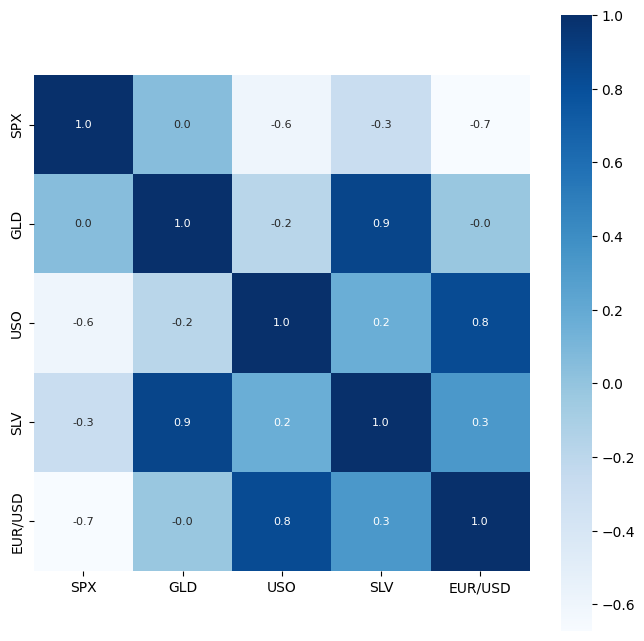

In [ ]:
# Checking the correlation between the data
df_numeric = df.drop(columns=['Date'])
correlation = df_numeric.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# getting correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3524004050.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

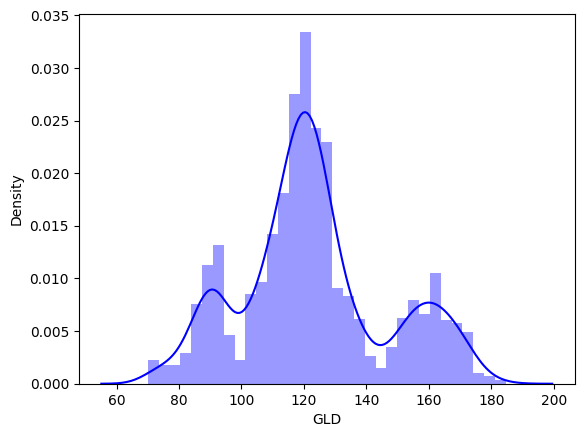

In [ ]:
# check the distribution of the gold price
sns.distplot(df['GLD'], color='blue')

In [ ]:
# splitting the features and target
X = df.drop(['Date', 'GLD'], axis=1)
Y = df['GLD']
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# splitting the train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [ ]:
# training the model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
# evaluating the model on the training set
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

# checking the accuracy of our model
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", score_1)

[109.97589835 114.7524012   90.6874001  ... 130.68449657 159.87579516
 114.74139992]
R squared error :  0.9984834705158881


In [ ]:
# testing the model on the test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

# checking the accuracy of our model
score_2 = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", score_2)

[168.67559953  82.14429995 115.88060007 127.65150062 120.65540135
 154.76339733 150.17179885 126.1723004  117.35479878 125.89620102
 117.010201   171.84860121 141.412398   167.71659805 115.3789001
 117.52720057 139.39960266 170.359401   159.63430304 157.25899954
 155.04040034 124.91810026 176.42319924 157.0023035  125.16160045
  93.73029941  77.31659996 120.39810026 119.16909993 167.54950007
  88.24670056 125.1659      91.13340063 117.63590032 121.12439904
 136.06579973 115.52320117 115.02050069 148.64259982 107.08790085
 103.90120234  87.19159791 126.4532008  117.98399995 152.55809862
 119.56410012 108.26070021 108.27459789  93.15430021 127.23049746
  75.10610017 113.59019906 121.09029989 111.4003991  118.87689888
 120.78659953 159.59399972 167.98350034 146.97979657  85.57709811
  94.43930051  86.83299905  90.49280013 118.86770079 126.46590042
 127.44560009 167.9035     122.21789935 117.58129859  98.32730069
 168.75270143 142.86589835 131.85190294 121.25340239 120.97309962
 119.541500

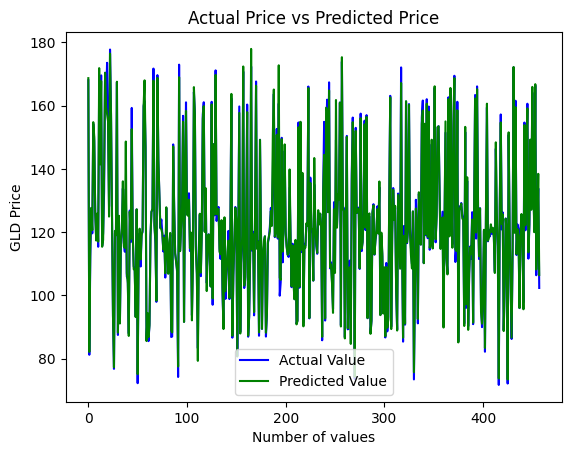

In [ ]:
# comparing the acutal and predicted values using a plot
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [27]:
# making the predictive system
input_data = (1390.189941,76.059998,15.5900,1.557099)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The price of gold in the year is : ', prediction[0])


[86.40369862]
The price of gold in the year is :  86.40369861999997


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
